<a href="https://colab.research.google.com/github/Sandwhaletree/Sandy-s-house/blob/main/WordCloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **🔥🔥🔥製作文字雲** #

### **👉1.簡易版-英文文字雲** ###
> #### **✍修改下方"修改1"即可跑程式✍** #### 
* #### [CNN網站](https://edition.cnn.com/) ####
>#### 將上述網站文字，全部複製貼到"記事本"內儲存成txt檔，並將檔案上傳至google colab:content文件夾，即為下方範例"cnn_20221122.txt" ####

In [60]:
#1-1 匯入文字雲套件
from wordcloud import WordCloud, STOPWORDS #文字雲套件-WordCloud
import matplotlib.pyplot as plt

In [61]:
# Read the whole text.
txtfile = "cnn_20221122.txt" #上傳cnn_20221122.txt檔案至content資料夾 #修改1
text = open(txtfile,"r",encoding="utf-8").read()

In [62]:
# Generate a word cloud image
wordcloud = WordCloud().generate(text)

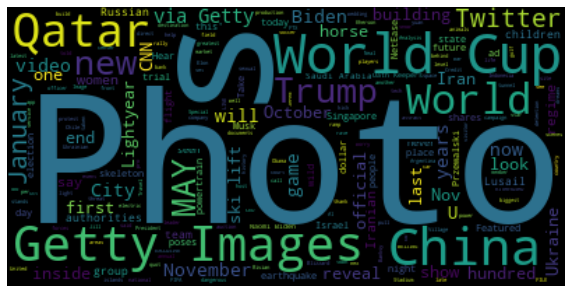

In [63]:
# 文字雲繪圖
plt.figure(figsize=(10,30))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [64]:
wordcloud.to_file('output1.png') #儲存檔案

### **👉2.進階版-英文文字雲:有底圖** ### 

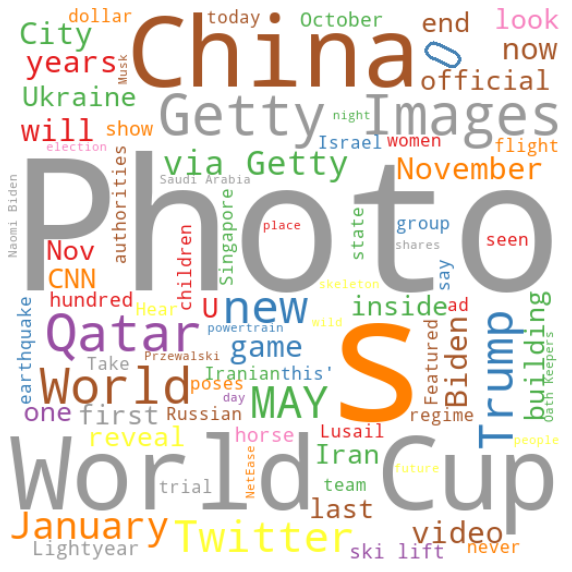

In [52]:
#匯入必要套件
from wordcloud import WordCloud, STOPWORDS
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Read the whole text.
txtfile = "cnn_20221122.txt"  #上傳cnn_20221122.txt檔案至content資料夾 #修改1
pngfile = "football_3.png"  # 上傳底圖.png檔案至content資料夾 #圖片推薦網 https://www.flaticon.com/ #修改2
text = open(txtfile,"r",encoding="utf-8").read()
alice_mask = np.array(Image.open(pngfile))

# Generate a word cloud image
wordcloud = WordCloud(width = 5000, height = 3000,background_color="white", mask=alice_mask, contour_width=3, contour_color='steelblue',max_font_size=300,min_font_size=10,colormap = "Set1").generate(text) #初步生成文字雲

# 繪圖
plt.figure(figsize=(10,30))
plt.imshow(wordcloud, interpolation="bilinear") #文字雲用圖片顯現 #interpolation="bilinear"圖片印出來畫素比較好的必需品
plt.axis("off")
plt.show()

#儲存檔案
# wordcloud.to_file('output2.png') #儲存檔案

### **👉3.進階版-中文版文字雲** ###
>* ### [1.Dict字典-下載點](https://raw.githubusercontent.com/ldkrsi/jieba-zh_TW/master/jieba/dict.txt) ###
* ### [2.Stopwords-下載點](https://github.com/kdchang/python-jieba-chart/blob/master/stopwords.txt) ###
* ### 3.繁體中文msjh.ttc字型 - 本機路徑尋找:C:/Windows/Fonts/微軟正黑體>複製"微軟正黑體"字型即是 ### 

Building prefix dict from /content/dict.txt ...
DEBUG:jieba:Building prefix dict from /content/dict.txt ...
Loading model from cache /tmp/jieba.ueb620ec8402181953a0299d7957c0d6e.cache
DEBUG:jieba:Loading model from cache /tmp/jieba.ueb620ec8402181953a0299d7957c0d6e.cache
Loading model cost 0.716 seconds.
DEBUG:jieba:Loading model cost 0.716 seconds.
Prefix dict has been built successfully.
DEBUG:jieba:Prefix dict has been built successfully.


{'新聞': 9, '選舉': 10, '聯合': 13, '林耕仁': 6, '主委': 6, '竹市': 6, '議長': 6, '22': 43, '2022': 41, '11': 47, '陸軍': 9, '上校': 7, '市長': 11, '國民黨': 8, '候選人': 12, '...': 25, '21': 12, '宣布': 12, '20': 7, '必勝': 13, '審查': 6, 'COP27': 12, '氣候': 10, '峰會': 6, '10': 6}


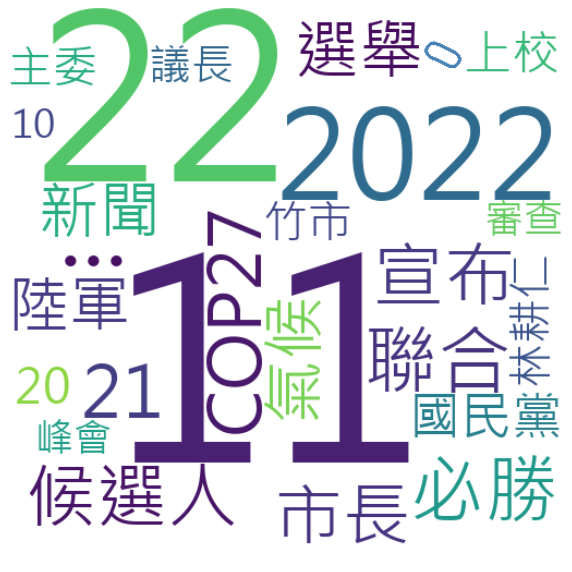

In [65]:
#匯入必要套件
from wordcloud import WordCloud, STOPWORDS
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import jieba
import jieba.analyse
from collections import Counter # 次數統計

#匯入相關中文字典檔
dictfile = "dict.txt"  # 上傳dict.txt字典檔 #上述網站全部複製，貼到記事本，儲存.txt檔使用 #修改1
stopfile = "stopwords.txt"  # 上傳stopwordstxt檔 #上述網站全部複製，貼到記事本，儲存.txt檔使用 #修改2
fontpath = "msjh.ttc"  # 上傳繁體中文字型檔 #修改3

mdfile = "news.txt"  # 上傳主要中文文檔chinesewords.txt #修改3
pngfile = "football_3.png"  # 剛才下載存的底圖 #修改4

alice_mask = np.array(Image.open(pngfile))

jieba.set_dictionary(dictfile)
jieba.analyse.set_stop_words(stopfile)

text = open(mdfile,"r",encoding="utf-8").read()

tags = jieba.analyse.extract_tags(text, topK=25)

seg_list = jieba.lcut(text, cut_all=False)
dictionary = Counter(seg_list)

freq = {}
for ele in dictionary:
    if ele in tags:
        freq[ele] = dictionary[ele]
print(freq) # 計算出現的次數

wordcloud = WordCloud(background_color="white", mask=alice_mask, contour_width=3, contour_color='steelblue', font_path= fontpath).generate_from_frequencies(freq)
plt.figure(figsize=(10,30))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()